# LeetCode

## Link

1. https://leetcode.com/

2. https://leetcode-cn.com/

## Demo

1. https://www.onlinegdb.com/

## Details

LeetCode: 743, 847

# LeetCode 743. Network Delay Time 网络延迟时间

You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the minimum time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.

有 n 个网络节点，标记为 1 到 n。给你一个列表 times，表示信号经过 有向 边的传递时间。 times[i] = (ui, vi, wi)，其中 ui 是源节点，vi 是目标节点， wi 是一个信号从源节点传递到目标节点的时间。现在，从某个节点 K 发出一个信号。需要多久才能使所有节点都收到信号？如果不能使所有节点收到信号，返回 -1 。

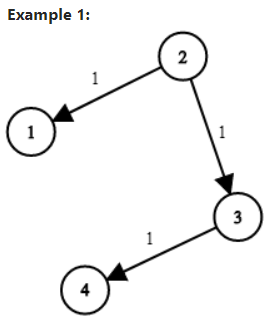

Example 1:

```
Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2
Output: 2
```

Example 2:

```
Input: times = [[1,2,1]], n = 2, k = 1
Output: 1
```

Example 3:

```
Input: times = [[1,2,1]], n = 2, k = 2
Output: -1
```

Constraints:

- 1 <= k <= n <= 100
- 1 <= times.length <= 6000
- times[i].length == 3
- 1 <= ui, vi <= n
- ui != vi
- 0 <= wi <= 100
- All the pairs (ui, vi) are unique. (i.e., no multiple edges.)

所有 (ui, vi) 对都 互不相同（即，不含重复边）



In [1]:
from typing import List
class Solution:
    # Bellman-Ford 算法
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        dis={node:float('inf') for node in range(1,n+1)}
        dis[k]=0
        for _ in range(n-1):
            for u,v,w in times:
                dis[v]=min(dis[v],dis[u]+w)
        res=max(dis.values())
        return res if res != float('inf') else -1   

# LeetCode 847. Shortest Path Visiting All Nodes 访问所有节点的最短路径

You have an undirected, connected graph of n nodes labeled from 0 to n - 1. You are given an array graph where graph[i] is a list of all the nodes connected with node i by an edge.

Return the length of the shortest path that visits every node. You may start and stop at any node, you may revisit nodes multiple times, and you may reuse edges.

存在一个由 n 个节点组成的无向连通图，图中的节点按从 0 到 n - 1 编号。

给你一个数组 graph 表示这个图。其中，graph[i] 是一个列表，由所有与节点 i 直接相连的节点组成。

返回能够访问所有节点的最短路径的长度。你可以在任一节点开始和停止，也可以多次重访节点，并且可以重用边。

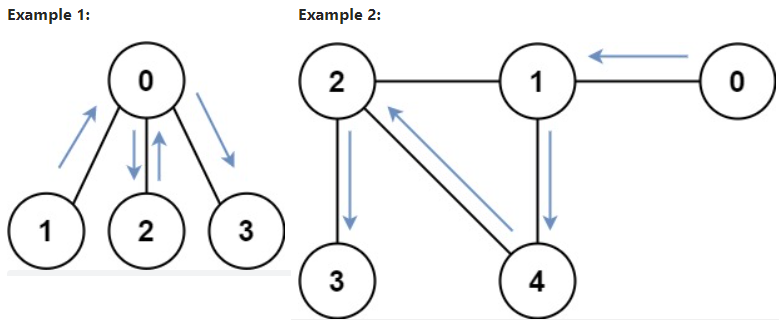

Example 1:

```
Input: graph = [[1,2,3],[0],[0],[0]]
Output: 4
Explanation: One possible path is [1,0,2,0,3]
一种可能的路径为 [1,0,2,0,3]
```

Example 2:

```
Input: graph = [[1],[0,2,4],[1,3,4],[2],[1,2]]
Output: 4
Explanation: One possible path is [0,1,4,2,3]
一种可能的路径为 [0,1,4,2,3]
```

Constraints:

- n == graph.length
- 1 <= n <= 12
- 0 <= graph[i].length < n
- graph[i] does not contain i.(graph[i] 不包含 i)
- If graph[a] contains b, then graph[b] contains a.(如果 graph[a] 包含 b ，那么 graph[b] 也包含 a)
- The input graph is always connected.(输入的图总是连通图)



In [2]:
class Solution:
    def shortestPathLength(self, graph: List[List[int]]) -> int:
        q = collections.deque([])
        visited = set()
        n = len(graph)
        for i in range(n):
            q.append((i, 1 << i))
            visited.add((i, 1 << i))
        dis = 0
        while q:
            dis += 1
            for _ in range(len(q)):
                cur, cur_state = q.popleft()
                for nxt in graph[cur]:
                    nxt_state = cur_state | (1 << nxt)
                    if nxt_state == (1 << n) - 1: return dis
                    if (nxt, nxt_state) not in visited:
                        q.append((nxt, nxt_state))
                        visited.add((nxt, nxt_state))
        return 0